Eigenvalues (A2): [0.9997472763061523, 2.9987096786499023, 4.996756553649902, 6.996756553649902, 8.996756553649902]


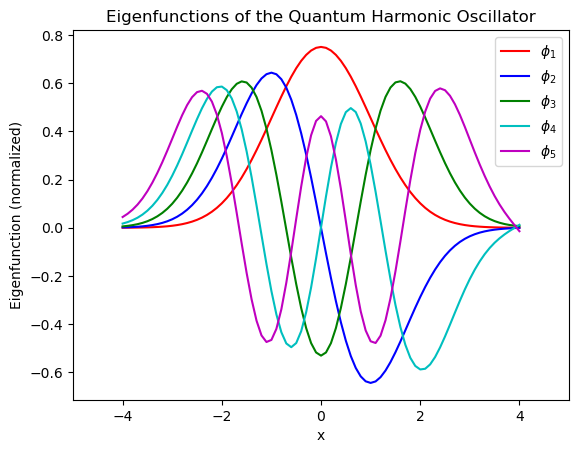

Eigenfunctions (A1): [[2.56594387e-04 1.45446832e-03 5.65266122e-03 1.74041983e-02
  4.46282893e-02]
 [3.77547080e-04 2.08360007e-03 7.86723723e-03 2.34675414e-02
  5.80809760e-02]
 [5.52005654e-04 2.96543030e-03 1.08769294e-02 3.14362469e-02
  7.51195051e-02]
 [7.99933110e-04 4.18160878e-03 1.48902870e-02 4.16630170e-02
  9.61026422e-02]
 [1.15078907e-03 5.85116103e-03 2.02183616e-02 5.47232169e-02
  1.21643538e-01]
 [1.64260869e-03 8.11715455e-03 2.71966112e-02 7.11426317e-02
  1.52132285e-01]
 [2.32194931e-03 1.11459786e-02 3.61791699e-02 9.13659157e-02
  1.87635170e-01]
 [3.24345697e-03 1.51271656e-02 4.75388481e-02 1.15756593e-01
  2.27894672e-01]
 [4.48015978e-03 2.02663241e-02 6.16550985e-02 1.44597056e-01
  2.72329465e-01]
 [6.13477564e-03 2.68698143e-02 7.89166536e-02 1.78107007e-01
  3.20034416e-01]
 [8.32810546e-03 3.52831987e-02 9.98540043e-02 2.16381575e-01
  3.69784955e-01]
 [1.11982107e-02 4.58507594e-02 1.24865727e-01 2.59011411e-01
  4.19909246e-01]
 [1.49004135e-02 5.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigs  # Using eigs() for sparse matrices
from scipy.integrate import solve_ivp

# Part A

# Constants
L = 4
K = 1
tol = 1e-4
col = ['r', 'b', 'g', 'c', 'm']
A1 = []
A2 = []

xshoot = np.arange(-L, L + 0.1, 0.1) # Discretized spatial domain

# Define the shooting equation system
def shoot2(x, y, beta):
    return [y[1], (K * x**2 - beta) * y[0]]

# Initial guess for beta (eigenvalue)
beta_start = -1

# Begin loop over the first five modes
for modes in range(1, 6):
    beta = beta_start
    dbeta = -1  # Step size for adjusting beta
   
    # Iterate to find the correct eigenvalue (beta)
    for _ in range(1000):
        # Initial conditions for y at x = -L (use small perturbation)
        y0 = [1e-5, np.sqrt(K*L**2 - beta)*1e-5]
        
        # Solve the differential equation using solve_ivp
        sol = solve_ivp(shoot2, [-L, L + 0.1], y0, args=(beta,), t_eval=xshoot)
        
        # Check if the solution meets the boundary condition at x = L
        if abs(sol.y[1, -1] - sol.y[0, -1] * -np.sqrt(K*L**2 - beta)) < tol:
            A2.append(beta)  # Save the eigenvalue
            break
        
        # Adjust beta (the eigenvalue)
        if (-1)**(modes + 1) * sol.y[0, -1] > 0:
            beta -= dbeta
        else:
            beta += dbeta
        dbeta /= 2  # Reduce step size for finer adjustment
   
    # Save the found eigenvalue and use it as the start for the next mode
    beta_start = beta + 0.5
   
    # Normalize the eigenfunction
    norm = np.trapz(sol.y[0]**2, xshoot)
    normalized_eigenfunction = sol.y[0] / np.sqrt(norm)
   
    # Append the normalized eigenfunction as a row to A1
    A1.append(np.abs(normalized_eigenfunction))
   
    # Plot the normalized eigenfunction
    plt.plot(xshoot, normalized_eigenfunction, col[modes - 1], label=f'$\\phi_{{{modes}}}$')

# Transpose
A1 = np.array(A1)
A1 = abs(A1.T)

print("Eigenvalues (A2):", A2)

# Show plot
plt.legend()
plt.title('Eigenfunctions of the Quantum Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('Eigenfunction (normalized)')
plt.xlim(-5, 5)
plt.show()

# Print the shape of A1
#print("Shape of A1 (eigenfunctions):", A1.shape)
print("Eigenfunctions (A1):", A1)

Eigenvalues: [0.99937572 2.99690372 4.9922955  6.98791381 8.99428772]


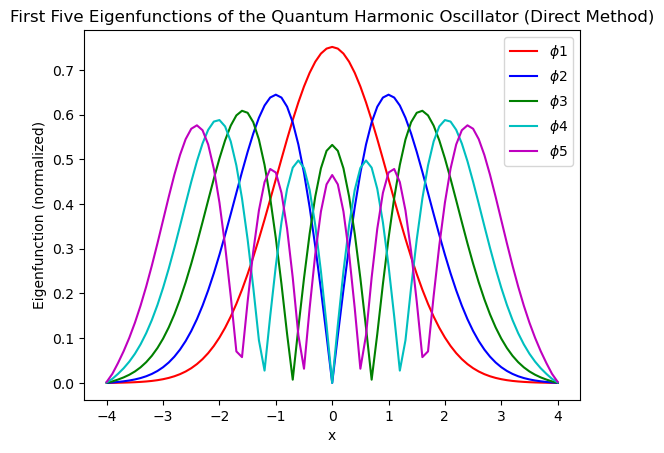

In [2]:
# Part B

# Parameters
L = 4                      
K = 1                                      
x = np.arange(-L, L + 0.1, 0.1)  
dx = 0.1          

# Constructing the matricies for each of the diagonals
main_diag =  (2/dx**2) + (K*x**2) * np.ones(len(x))
off_diag_up = - np.ones(len(x) - 1) / dx**2
off_diag_down = - np.ones(len(x) - 1) / dx**2

main_diag[0] = main_diag[0] * 4/3
main_diag[-1] = main_diag[-1] * 4/3

off_diag_up[0] = off_diag_up[0] * -1/3

off_diag_down[-1] = off_diag_up[-1] * -1/3

# Creating the matrix using each of the diagonals
A = diags([main_diag, off_diag_down, off_diag_up], [0, -1, 1])

# Solving for the first five eigenvalues and eigenfunctions
eigenvalues, eigenfunctions = eigs(A, k=5, which='SM')  # Sorted automatically "SM SORTS SMALL TO LARGE"

# Extract real parts
eigenvalues = eigenvalues.real
eigenfunctions = eigenfunctions.real

# Normalize the eigenfunctions
eigenfunctions = eigenfunctions / np.sqrt(np.trapz(np.abs(eigenfunctions)**2, x, axis=0))

# Output the eigenvalues and eigenfunctions
print("Eigenvalues:", eigenvalues)

# Plotting the first five normalized eigenfunctions
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(len(eigenvalues)):
    plt.plot(x, np.abs(eigenfunctions[:, i]), colors[i], label=f'$\phi{{{i+1}}}$')

plt.title('First Five Eigenfunctions of the Quantum Harmonic Oscillator (Direct Method)')
plt.xlabel('x')
plt.ylabel('Eigenfunction (normalized)')
plt.legend()
plt.show()

A3 = abs(eigenfunctions).T
A4 = eigenvalues

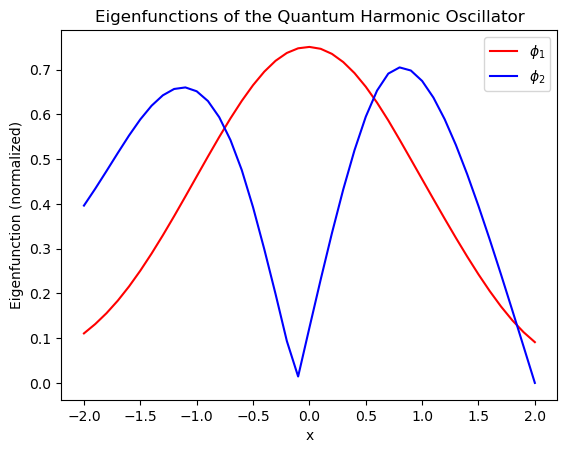

In [30]:
#Part C

# Constants
L = 2  # The boundary for x, as specified in the problem
K = 1  # Given in the problem, K=1
gamma = 0.05
tol = 1e-6  # Convergence tolerance
col = ['r', 'b', 'g', 'c', 'm']  # Colors for different modes
A5 = []  # To store absolute values of eigenfunctions
A6 = []  # To store eigenvalues

# Define the shooting equation system
def shoot2(x, y, beta):
    return [y[1], (gamma * abs(y[0]**2) + K * x**2 - beta) * y[0]]

# Range of x
xshoot = np.arange(-L, L + 0.1, 0.1)

# Initial guess for beta (eigenvalue)
beta_start = -1

# Begin loop over the first five modes
for modes in range(1, 3):
    beta = beta_start
    dbeta = -1  # Step size for adjusting beta
    
    # Iterate to find the correct eigenvalue (beta)
    for _ in range(1000):
        # Initial conditions for y at x = -L 
        y0 = [1e-5, np.sqrt(K*L**2 - beta)*1e-5]  
        
        # Solve the differential equation using odeint
        sol = solve_ivp(shoot2, [-L, L + 0.1], y0, args=(beta,), t_eval=xshoot)
        
        # Check if the solution meets the boundary condition at x = L
        if abs(sol.y[1, -1] - sol.y[0, -1] * -np.sqrt(K*L**2 - beta)) < tol:
            if (abs(np.trapz(sol.y[0]) - 1)) < tol:
                areas.append(area)
                A6.append(beta)  # Save the eigenvalue
                break
        
        # Adjust beta (the eigenvalue)
        if (-1)**(modes + 1) * sol.y[0, -1] > 0:
            beta -= dbeta
        else:
            beta += dbeta
        dbeta /= 2  # Reduce step size for finer adjustment
   
    # Save the found eigenvalue and use it as the start for the next mode
    beta_start = beta + 0.5
   
    # Normalize the eigenfunction
    norm = np.trapz(sol.y[0]**2, xshoot)
    normalized_eigenfunction = sol.y[0] / np.sqrt(norm)
   
    # Append the normalized eigenfunction as a row to A5
    A5.append(np.abs(normalized_eigenfunction))
   
    # Plot the normalized eigenfunction
    plt.plot(xshoot, np.abs(normalized_eigenfunction), col[modes - 1], label=f'$\\phi_{{{modes}}}$')


A6 = np.array(A6).T  # Transpose to have eigenfunctions as columns

# Show plot
plt.legend()
plt.title('Eigenfunctions of the Quantum Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('Eigenfunction (normalized)')
plt.show()


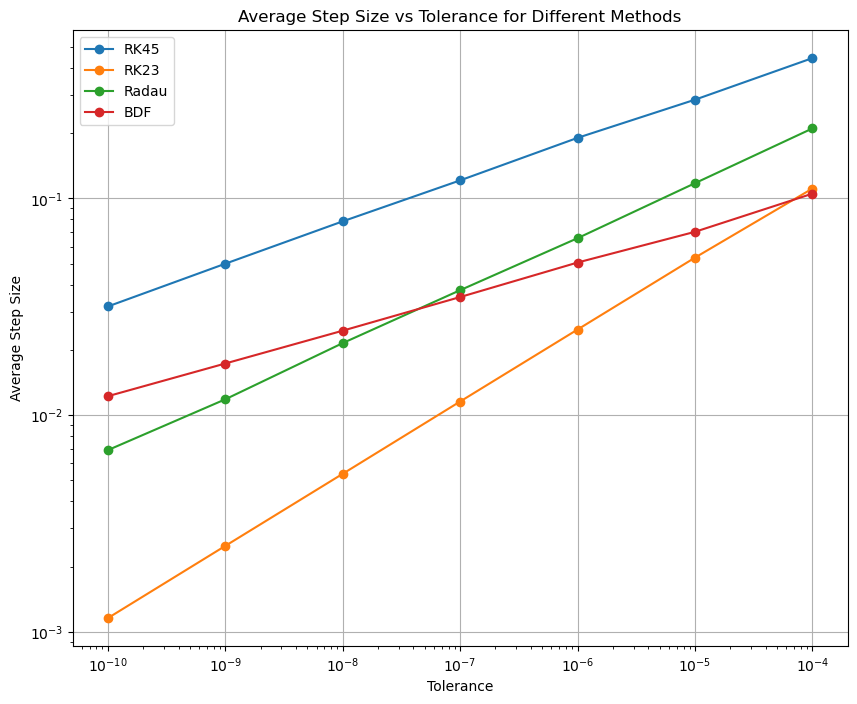

Slopes (A9): [0.19063067 0.33121183 0.24761007 0.1547974 ]


In [55]:
# Given parameters
L = 2
K = 1
E = 1  # Energy level
gamma = 0  
beta = 1

# Initial conditions
phi_initial = 1
phi_x_initial = np.sqrt(K * L**2 - 1)
y0 = [phi_initial, phi_x_initial]  # Initial conditions vector

# Domain for x
x_span = [-L, L]

# Tolerance values
TOL = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Define the ODE function (replace with the actual system equations)
def shoot2(x, y, E):
    phi, phi_x = y  # Unpack the state vector y
    dphi_dx = phi_x  # Derivative of phi
    dphi_x_dx = (K * x**2 - beta) * phi  # Second derivative of phi
    return [dphi_dx, dphi_x_dx]

# Initialize arrays to store the average step sizes for each tolerance
avg_step_sizes_RK45 = []
avg_step_sizes_RK23 = []
avg_step_sizes_Radau = []
avg_step_sizes_BDF = []

# Solve the ODE for each tolerance and each method, then calculate average step size
for tol in TOL:
    options = {'rtol': tol, 'atol': tol}
    
    # RK45
    sol_RK45 = solve_ivp(shoot2, x_span, y0, method='RK45', args=(E,), **options)
    avg_step_sizes_RK45.append(np.mean(np.diff(sol_RK45.t)))
    
    # RK23
    sol_RK23 = solve_ivp(shoot2, x_span, y0, method='RK23', args=(E,), **options)
    avg_step_sizes_RK23.append(np.mean(np.diff(sol_RK23.t)))
    
    # Radau
    sol_Radau = solve_ivp(shoot2, x_span, y0, method='Radau', args=(E,), **options)
    avg_step_sizes_Radau.append(np.mean(np.diff(sol_Radau.t)))
    
    # BDF
    sol_BDF = solve_ivp(shoot2, x_span, y0, method='BDF', args=(E,), **options)
    avg_step_sizes_BDF.append(np.mean(np.diff(sol_BDF.t)))

# Plotting on a log-log scale
plt.figure(figsize=(10, 8))
plt.loglog(TOL, avg_step_sizes_RK45, label="RK45", marker='o')
plt.loglog(TOL, avg_step_sizes_RK23, label="RK23", marker='o')
plt.loglog(TOL, avg_step_sizes_Radau, label="Radau", marker='o')
plt.loglog(TOL, avg_step_sizes_BDF, label="BDF", marker='o')
plt.xlabel("Tolerance")
plt.ylabel("Average Step Size")
plt.title("Average Step Size vs Tolerance for Different Methods")
plt.legend()
plt.grid(True)
plt.show()

# Using polyfit to get the slopes on the log-log data
slopes = np.zeros(4)
slopes[0] = np.polyfit(np.log(TOL), np.log(avg_step_sizes_RK45), 1)[0]
slopes[1] = np.polyfit(np.log(TOL), np.log(avg_step_sizes_RK23), 1)[0]
slopes[2] = np.polyfit(np.log(TOL), np.log(avg_step_sizes_Radau), 1)[0]
slopes[3] = np.polyfit(np.log(TOL), np.log(avg_step_sizes_BDF), 1)[0]

# Print and save the slopes
print("Slopes (A9):", slopes)
A9 = slopes


In [40]:
# Constants
L = 4  # The boundary for x, as specified in the problem
K = 1  # Given in the problem, K=1
tol = 1e-4  # Convergence tolerance
col = ['r', 'b', 'g', 'c', 'm']  # Colors for different modes
A1T = []  # To store absolute values of eigenfunctions
A2 = []  # To store eigenvalues

# Define the shooting equation system
def shoot2(y, x, beta):
    return [y[1], (K * x**2 - beta) * y[0]]

# Range of x
xshoot = np.arange(-L, L + 0.1, 0.1)

# Initial guess for beta (eigenvalue)
beta_start = -1

# Begin loop over the first five modes
for modes in range(1, 6):
    beta = beta_start
    dbeta = -1  # Step size for adjusting beta
    
    # Iterate to find the correct eigenvalue (beta)
    for _ in range(1000):
        # Initial conditions for y at x = -L 
        y0 = [1e-5, np.sqrt(K*L**2 - beta)*1e-5]  
        
        # Solve the differential equation using odeint
        y = odeint(shoot2, y0, xshoot, args=(beta,))
        
        # Check if the solution meets the boundary condition at x = L
        if abs(y[-1, 1] + y[-1, 0] * np.sqrt(K*L**2 - beta)) < tol:  # y at x = L
            print(f"Eigenvalue for mode {modes}: {beta}")
            A2.append(beta)
            break
        
        # Adjust beta (the eigenvalue)
        if (-1)**(modes + 1) * y[-1, 0] > 0:
            beta -= dbeta
        else:
            beta += dbeta
        dbeta /= 2  # Reduce step size for finer adjustment
    
    # Save the found eigenvalue and use it as the start for the next mode
    beta_start = beta + 0.5
    
    # Normalize the eigenfunction
    norm = np.trapz(y[:, 0]**2, xshoot)
    normalized_eigenfunction = y[:, 0] / np.sqrt(norm)
    
    # Append the absolute value of the eigenfunction to matrix A1
    A1T.append(np.abs(normalized_eigenfunction))

# Convert A1 to a numpy array for easier manipulation
A1 = np.array(A1T).T  # Transpose to have eigenfunctions as columns

def psi_1(x):
    return (np.sqrt(2) * np.pi ** (-1/4)) * x * np.exp(-0.5 * x**2)

def psi_2(x):
    return (np.sqrt(2) * np.pi ** (-1/4))**-1 * (2 * x**2 - 1) * np.exp(-0.5 * x**2)

def psi_3(x):
    return (np.sqrt(3) * np.pi ** (-1/4))**-1 * (2 * x**3 - 3 * x) * np.exp(-0.5 * x**2)

def psi_4(x):
    return (2 * np.sqrt(6) * np.pi ** (-1/4))**-1 * (4 * x**4 - 12 * x**2 + 3) * np.exp(-0.5 * x**2)

def psi_5(x):
    return (2 * np.sqrt(15) * np.pi ** (-1/4))**-1 * (4 * x**5 - 20 * x**3 + 15 * x) * np.exp(-0.5 * x**2)

func1 = abs(psi_1(xshoot))
func2 = abs(psi_2(xshoot))
func3 = abs(psi_3(xshoot))
func4 = abs(psi_4(xshoot))
func5 = abs(psi_5(xshoot))

exact = np.array([func1, func2, func3, func4, func5]) 

diff_square = (A1T - exact)**2
A10 = np.trapz(diff_square, xshoot)

exact_eigs = np.array([1,3,5,7,9])
A11 = ((abs(A2-exact_eigs))/exact_eigs) * 100

Eigenvalue for mode 1: 0.9999990463256836
Eigenvalue for mode 2: 2.9999990463256836
Eigenvalue for mode 3: 4.999999046325684
Eigenvalue for mode 4: 6.999999046325684
Eigenvalue for mode 5: 8.999999046325684


In [41]:
# Constructing the matricies for each of the diagonals
main_diag =  (2/dx**2) + (K*x**2) * np.ones(len(x))
off_diag_up = - np.ones(len(x) - 1) / dx**2
off_diag_down = - np.ones(len(x) - 1) / dx**2

main_diag[0] = main_diag[0] * 4/3
main_diag[-1] = main_diag[-1] * 4/3

off_diag_up[0] = off_diag_up[0] * -1/3

off_diag_down[-1] = off_diag_up[-1] * -1/3

# Creating the matrix using each of the diagonals
A = diags([main_diag, off_diag_down, off_diag_up], [0, -1, 1])

# Solving for the first five eigenvalues and eigenfunctions
eigenvalues, eigenfunctions = eigs(A, k=5, which='SM')  # Sorted automatically "SM SORTS SMALL TO LARGE"

# Extract real parts
eigenvalues = eigenvalues.real
eigenfunctions = eigenfunctions.real

# Normalize the eigenfunctions
eigenfunctions = eigenfunctions / np.sqrt(np.trapz(eigenfunctions**2, x, axis=0))

# Output the eigenvalues and eigenfunctions
print("Eigenvalues:", eigenvalues)
A = abs(eigenfunctions).T
B = eigenvalues

func1 = abs(psi_1(xshoot))
func2 = abs(psi_2(xshoot))
func3 = abs(psi_3(xshoot))
func4 = abs(psi_4(xshoot))
func5 = abs(psi_5(xshoot))

exact = np.array([func1, func2, func3, func4, func5]) 

diff_square = (A - exact)**2
A12 = np.trapz(diff_square, xshoot)

exact_eigs = np.array([1,3,5,7,9])
A13 = ((abs(B-exact_eigs))/exact_eigs) * 100

Eigenvalues: [0.99937572 2.99690372 4.9922955  6.98791381 8.99428772]
